In [1]:
#anomaly detection with isolation forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('../generated_cpu_data.csv')
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,cpu_util,date
0,89.447320,2023-06-25 00:03:05.640
1,57.320538,2023-06-25 00:08:05.640
2,87.058688,2023-06-25 00:13:05.640
3,87.409467,2023-06-25 00:18:05.640
4,78.111494,2023-06-25 00:23:05.640


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[['cpu_util']])
X.shape

(8640, 1)

In [7]:
#train model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.5), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(X)

IsolationForest(contamination=0.5, n_jobs=-1, random_state=42)

In [15]:
#predict anomaly
#predict anomaly
df['anomaly'] = pd.Series(model.predict(X))
df['anomaly'] = df['anomaly'].map( {1: 0, -1: 1} )
print(df['anomaly'].value_counts())

1    4320
0    4320
Name: anomaly, dtype: int64


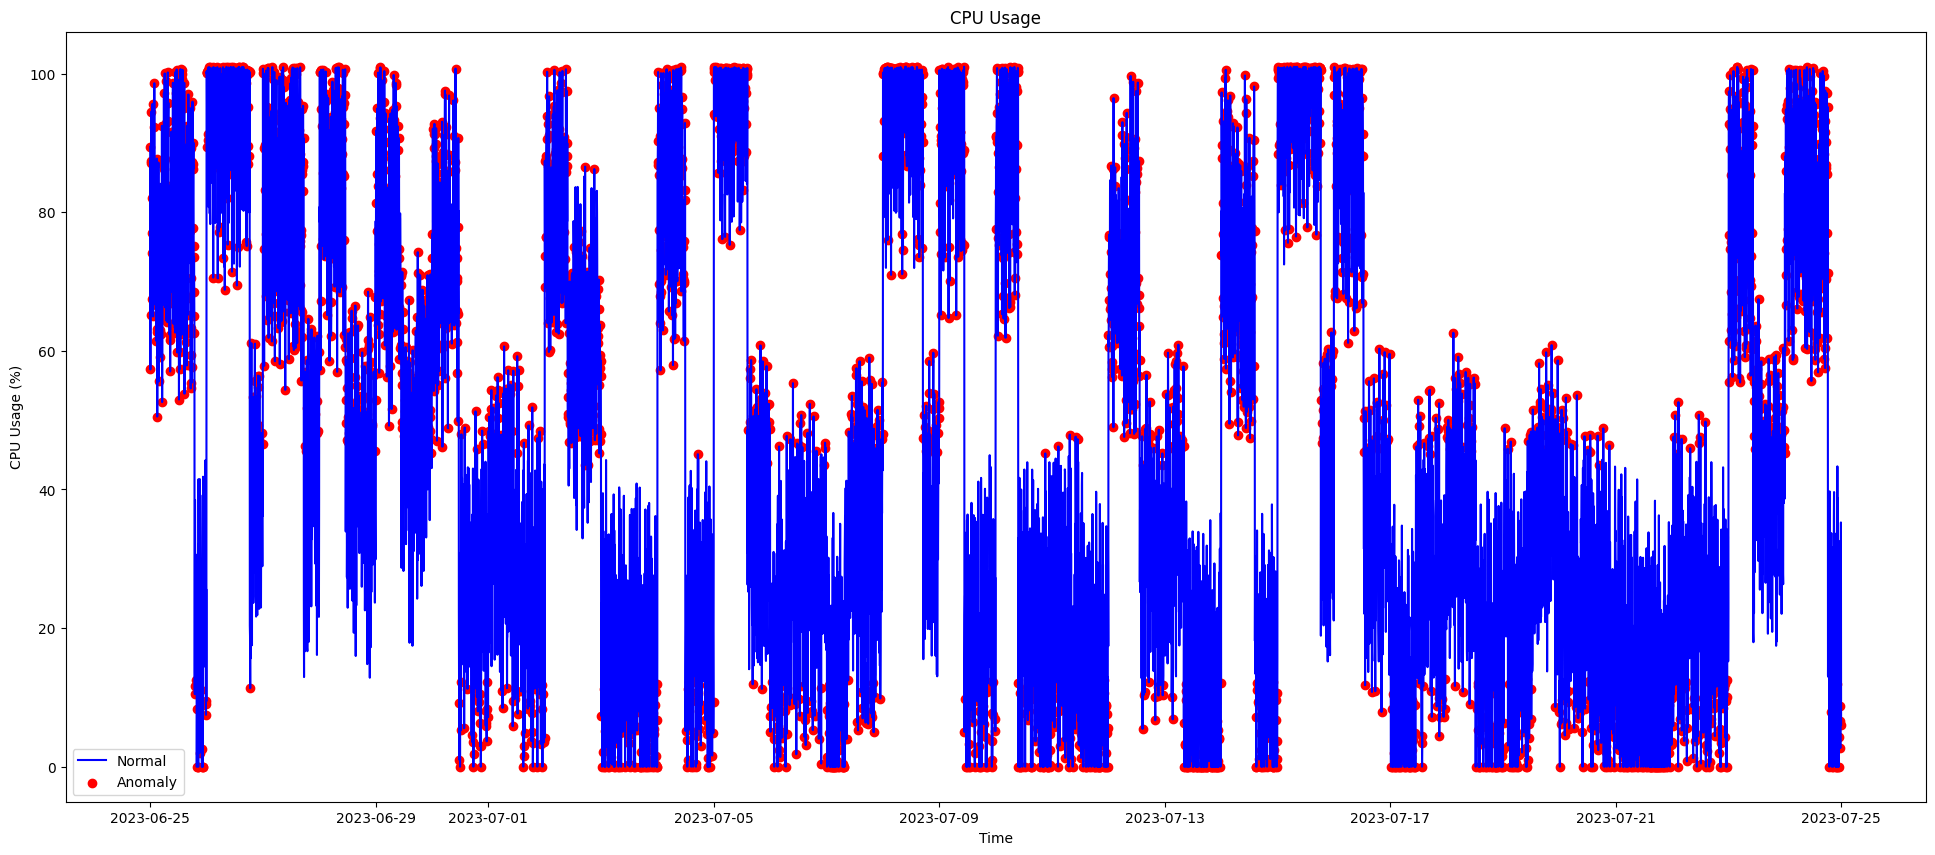

In [17]:
#plot anomalies
a = df.loc[df['anomaly'] == 1, ['date', 'cpu_util']] #anomaly

plt.figure(figsize=(24, 10))
plt.plot(df['date'], df['cpu_util'], color='blue', label = 'Normal')
plt.scatter(a['date'],a['cpu_util'], color='red', label = 'Anomaly')
plt.title('CPU Usage')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.legend()
plt.show()